# ***Библиотеки***

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_csv('dataset.csv')

# ***EDA и ресерч-анализ.***

In [3]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


***Анализ датасета***    

**Unnamed: 0** - ID трека в датасете  
**track_id** - ID трека на Spotify  
**artists** - исполнители трека, перечисляются через ";"  
**album_name** - название альбома  
**track_name** - название трека  
**popularity** - популярность трека на Spotify, от 0 до 100  
**duration_ms** - длительность трека в миллисекундах  
**explicit** - есть ли нецензурная лексика в треке  
**danceability** - танцевальность трека, от 0 до 1  
**energy** - энергичность трека, от 0 до 1  
**loudness** - громкость трека в дБ  
**key** - музыкальный ключ трека  
**mode** - тоннальность трека, 0 - минор, 1 - мажор  
**speechiness** - речистость трека, от 0 до 1  
**acousticness** - акустика трека, от 0 до 1  
**instrumentalness** - инстурментальность трека, от 0 до 1  
**liveness** - живость трека, от 0 до 1  
**valence** - позитивность трека, от 0 до 1  
**tempo** - темп трека в BPM  
**time_signature** - предполагаемый общий тактовый размер трека  
**track_genre** - жанр трека
  
*Исходя из значения столбцов были убраны Unnamed: 0 и track_id они будут бесполезны*

In [4]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('track_id', axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [6]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [7]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [8]:
data.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

**Влияние длительности трека на популярность**

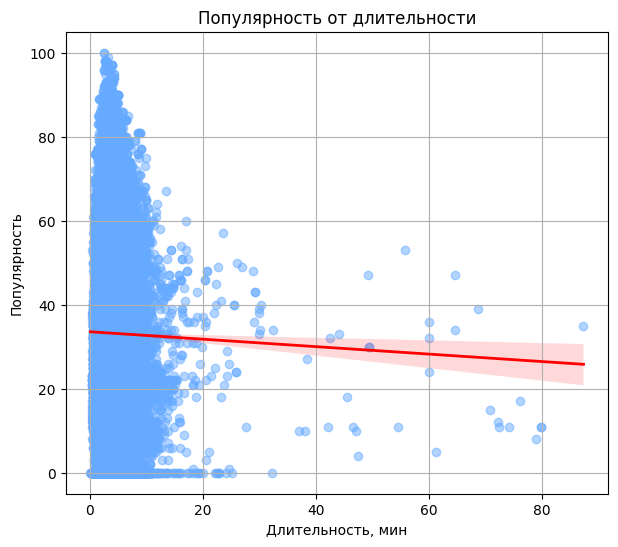

In [38]:
plt.figure(figsize=(7,6))
sns.regplot(data=data, x=data['duration_ms']/60000, y='popularity',
            scatter_kws={'alpha':0.5, 'color':'#66AAFF'},
            line_kws={'color':'#FF0000', 'linewidth':2})

plt.title('Популярность от длительности')
plt.xlabel('Длительность, мин')
plt.ylabel('Популярность')
plt.grid()

**Вывод**  
Самые популярные треки находятся в диапазоне длительности 3-4 мин  
Большинство треков длится не больше 11 мин

In [12]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [13]:
categorical_features

['artists', 'album_name', 'track_name', 'track_genre']

In [14]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [25]:
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,3287,14796,22528,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,12397,39162,60774,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,14839,8580,9580,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,5255,16899,25689,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,22486,66,65090,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,4952,5028,38207,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,18534,7238,21507,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  int64  
 1   album_name        113999 non-null  int64  
 2   track_name        113999 non-null  int64  
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

In [17]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [19]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = data['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - loss: 630.4034 - val_loss: 479.2523
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 472.5685 - val_loss: 466.1879
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - loss: 456.6264 - val_loss: 457.6135
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - loss: 450.0949 - val_loss: 455.4822
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - loss: 447.0998 - val_loss: 450.9667
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - loss: 440.9500 - val_loss: 446.7050
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - loss: 435.9982 - val_loss: 444.1011
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - loss: 431.9850 - val_loss: 441.9446
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - loss: 427.8587 - val_loss: 438.2956
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - loss: 426.8494 - val_loss: 434.5409
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - loss: 435.3495
Test Loss: 4

In [22]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
MAE: 16.701637268066406
RMSE: 20.69151871016729


MSE = квадрат
MAE = модуль
RMSE = MSE с корнем

R2

MAPE. 

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

1.870458257408e+16

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
713/713 ━━━

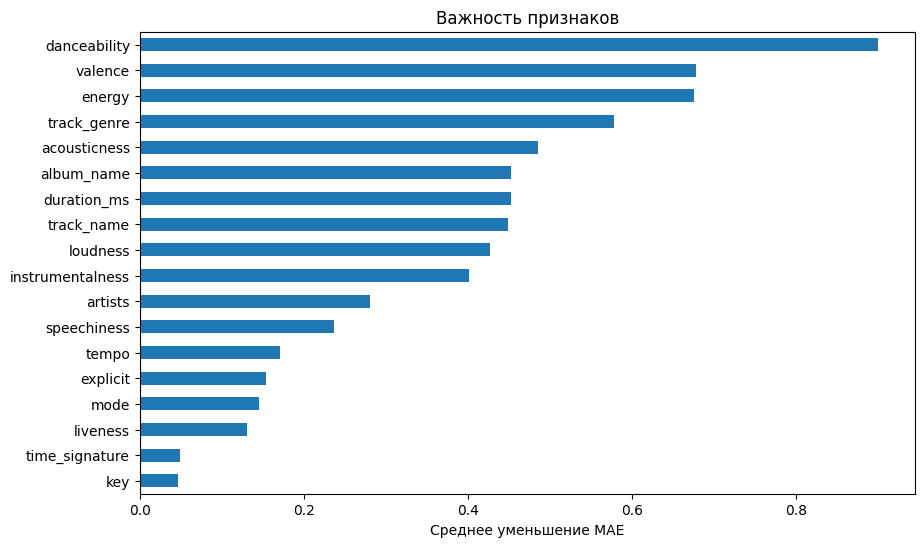

In [24]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()